# Symphysis-Fetal Head Segmentation

The high risk of maternal and perinatal morbidity is associated with longer labor duration due to the slow progression of fetal descent, but accurate assessment of fetal descent by monitoring the fetal head (FH) station remains a clinical challenge in guiding obstetric management. Based on clinical findings, the transvaginal digital examination is the most commonly used clinical estimation method of fetal station. However, this traditional approach is very subjective, often difficult, and unreliable. The need of an objective diagnosis found its solution in the use of transperineal ultrasound (TPU) able to assess FH station by measuring the angle of progression (AoP) that is the extension the FH goes through in its descent.

## Required Library

In [ ]:
!pip install pipreqs

  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=701035d520aba45d17d0f83d9e097e564e15e9101d2c0101c34f61634cb21d53
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
!pip install SimpleITK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 10.9 MB/s eta 0:00:00


## Mount Google Drive to access your data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pretrain_root_path = '/content/drive/MyDrive/Other_Data/XPIE/XPIE_What is a Salient Object/Ground/'
root_path = '/content/drive/MyDrive/MICCAI 2023'

## Explore Pre-train Data Examples

XPIE
http://cvteam.net/projects/CVPR17-ELE/ELE.html

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms.functional as TF
from PIL import Image
import numpy as np

In [ ]:
import SimpleITK as sitk
from skimage.util import montage as montage2d
import matplotlib.pyplot as plt

In [ ]:
import sys
np.set_printoptions(threshold=sys.maxsize)

SimpleITK Instruction:
http://insightsoftwareconsortium.github.io/SimpleITK-Notebooks/Python_html/03_Image_Details.html
http://insightsoftwareconsortium.github.io/SimpleITK-Notebooks/Python_html/04_Image_Display.html

In [ ]:
train_data_dir = root_path + '/train_data'

## View Example Images

In [ ]:
def image_reader(img_path, isMask):
  img = sitk.ReadImage(img_path)
  nda = sitk.GetArrayFromImage(img)
  #print(nda.shape)

  if isMask:
    img_rgb = Image.fromarray(nda,'L')
    img_array = nda
  else:
    img_array = np.transpose(nda,(1,2,0))
    img_rgb = Image.fromarray(img_array,'RGB')

  return img_rgb, img_array

In [ ]:
image = sitk.ReadImage(train_data_dir + '/image_mha/00001.mha')

In [ ]:
print(image.GetDimension())
print(image.GetWidth())
print(image.GetHeight())
print(image.GetSize())
print(image.GetNumberOfComponentsPerPixel())
print(image.GetDepth())

3
256
256
(256, 256, 3)
1
3


In [ ]:
nda = sitk.GetArrayFromImage(image)
print(nda.shape)

(3, 256, 256)


In [ ]:
image_xslice = sitk.GetArrayViewFromImage(image)[0,:,:]
image_yslice = sitk.GetArrayViewFromImage(image)[1,:,:]
image_zslice = sitk.GetArrayViewFromImage(image)[2,:,:]

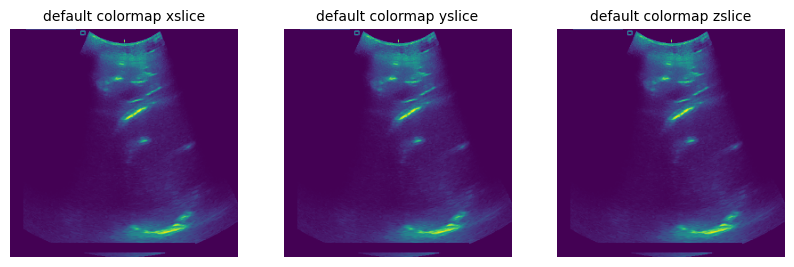

In [ ]:
fig = plt.figure(figsize=(10,3))

fig.add_subplot(1,3,1)
plt.imshow(image_xslice)
plt.title('default colormap xslice', fontsize=10)
plt.axis('off')

fig.add_subplot(1,3,2)
plt.imshow(image_yslice);
plt.title('default colormap yslice', fontsize=10)
plt.axis('off')

fig.add_subplot(1,3,3)
plt.title('default colormap zslice', fontsize=10)
plt.imshow(image_zslice)
plt.axis('off');

In [ ]:
mask = sitk.ReadImage(train_data_dir + '/label_mha/00001.mha')

In [ ]:
print(mask.GetDimension())
print(mask.GetWidth())
print(mask.GetHeight())
print(mask.GetSize())
print(mask.GetNumberOfComponentsPerPixel())
print(mask.GetDepth())

2
256
256
(256, 256)
1
0


In [ ]:
mask_xslice = sitk.GetArrayViewFromImage(mask)
#mask_yslice = sitk.GetArrayViewFromImage(mask)[1,:,:]
#mask_zslice = sitk.GetArrayViewFromImage(image)[2,:,:]

(-0.5, 255.5, 255.5, -0.5)

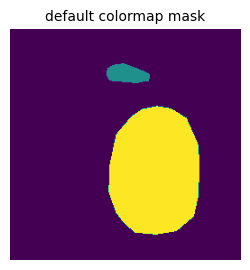

In [ ]:
fig = plt.figure(figsize=(10,3))

fig.add_subplot(1,1,1)
plt.imshow(mask_xslice)
plt.title('default colormap mask', fontsize=10)
plt.axis('off')

In [ ]:
index = 200

In [ ]:
image, img_np = image_reader(train_data_dir + f'/image_mha/{index:05d}.mha', False)
mask, mask_np = image_reader(train_data_dir + f'/label_mha/{index:05d}.mha', True)

In [ ]:
#mask2, mask2_np = image_reader(train_data_dir + '/label_mha/04000.mha', True)

(-0.5, 255.5, 255.5, -0.5)

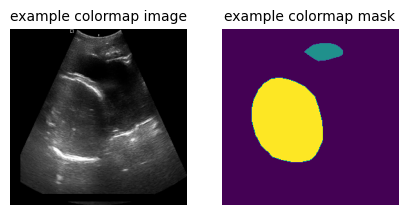

In [ ]:
fig = plt.figure(figsize=(5,5))

fig.add_subplot(1,2,1)
plt.imshow(img_np)
plt.title('example colormap image', fontsize=10)
plt.axis('off')

fig.add_subplot(1,2,2)
plt.imshow(mask_np);
plt.title('example colormap mask', fontsize=10)
plt.axis('off')

In [ ]:
mask_np = torch.tensor(mask_np)
#mask2_np = torch.tensor(mask2_np)

In [ ]:
import torch.nn.functional as F
mask_dict = {0:'background', 1:'ground', 2:'head'}
mask_np = mask_np.type(torch.LongTensor)
main_mask = F.one_hot(mask_np, len(mask_dict))
main_mask = np.asarray(main_mask)
main_mask.shape

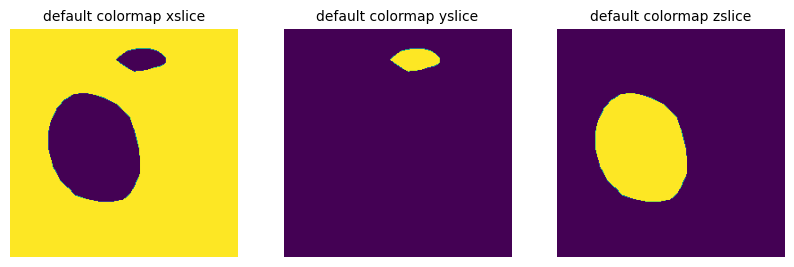

In [ ]:
fig = plt.figure(figsize=(10,3))

fig.add_subplot(1,3,1)
plt.imshow(main_mask[:,:,0])
plt.title('default colormap xslice', fontsize=10)
plt.axis('off')

fig.add_subplot(1,3,2)
plt.imshow(main_mask[:,:,1]);
plt.title('default colormap yslice', fontsize=10)
plt.axis('off')

fig.add_subplot(1,3,3)
plt.title('default colormap zslice', fontsize=10)
plt.imshow(main_mask[:,:,2])
plt.axis('off');

## Dataset Preparation



In [ ]:
import os
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import albumentations as A
from albumentations.pytorch import ToTensorV2
import numpy as np
import glob
import torch.nn.functional as F
import torchvision.transforms as T

In [ ]:
TRAIN_IMG_DIR = root_path + '/train_data/image_mha/'
TRAIN_MASK_DIR = root_path + '/train_data/label_mha/'

VAL_IMG_DIR = root_path + "/val_data/image_mha/"
VAL_MASK_DIR = root_path + "/val_data/label_mha/"

In [ ]:
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256

In [ ]:
train_transform = A.Compose(
    [
        A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),
        A.CoarseDropout(
            max_holes = 4, # Maximum number of regions to zero out. (default: 8)
            max_height = 4, # Maximum height of the hole. (default: 8)
            max_width = 4, # Maximum width of the hole. (default: 8)
            min_holes=None, # Minimum number of regions to zero out. (default: None, which equals max_holes)
            min_height=None, # Minimum height of the hole. (default: None, which equals max_height)
            min_width=None, # Minimum width of the hole. (default: None, which equals max_width)
            fill_value=0, # value for dropped pixels.
            mask_fill_value=None, # fill value for dropped pixels in mask.
            always_apply=False,
            p=0.5
            ),
        A.Rotate(limit=25, p=1.0),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.3),
        A.Normalize(
            mean=[0.0, 0.0, 0.0],
            std=[1.0, 1.0, 1.0],
            max_pixel_value=255.0,
        ),
        ToTensorV2(),
     ],
)

val_transforms = A.Compose(
    [
        A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),
        A.Normalize(
            mean=[0.0, 0.0, 0.0],
            std=[1.0, 1.0, 1.0],
            max_pixel_value=255.0,
        ),
        ToTensorV2(),
     ],
)

In [ ]:
CLASSES = ['background','head','pubic symphysis']

In [ ]:
class FetalUSDataset(Dataset):
  def __init__(self, image_dir, mask_dir, transform=None):
    self.image_dir = image_dir
    self.mask_dir = mask_dir
    self.transform = transform
    self.images = os.listdir(image_dir)

  def __len__(self):
    return len(self.images)

  def __getitem__(self, index):
    img_path = os.path.join(self.image_dir, self.images[index])
    mask_path = os.path.join(self.mask_dir, self.images[index])

    _, image = image_reader(img_path, False)
    _, mask = image_reader(mask_path, True)

    #image = np.array(Image.open(img_path).convert("RGB"))
    #mask = fill_contour_region(mask_path)
    #mask = np.array(Image.open(mask_path).convert("L"), dtype=np.float32)
    #mask[mask == 255.0] = 1.0

    if self.transform is not None:
      augmentations = self.transform(image=image, mask=mask)
      image = augmentations["image"]
      mask = augmentations["mask"]

    mask = mask.type(torch.LongTensor)
    mask_onehot = F.one_hot(mask, len(CLASSES))
    mask_stack = torch.stack((mask_onehot[:,:,0], mask_onehot[:,:,1], mask_onehot[:,:,2]))
    mask_stack = mask_stack.type(torch.IntTensor)

    return image, mask_stack #torch.permute(mask_stack, (2,0,1))

In [ ]:
def get_loaders(
    train_dir,
    train_maskdir,
    val_dir,
    val_maskdir,
    batch_size,
    train_transform,
    val_transform,
    num_workers=4,
    pin_memory=True,
    is_split=True,
    split_ratio=0.01
):
    train_ds = FetalUSDataset(
        image_dir=train_dir,
        mask_dir=train_maskdir,
        transform=train_transform,
    )

    if is_split:
      val_size = int(split_ratio * len(train_ds))
      train_size = len(train_ds) - val_size
      train_ds, val_ds = torch.utils.data.random_split(train_ds, [train_size, val_size])
    else:
      val_ds = FetalUSDataset(
          image_dir=val_dir,
          mask_dir=val_maskdir,
          transform=val_transform,
          )

    train_loader = DataLoader(
        train_ds,
        batch_size=batch_size,
        num_workers=num_workers,
        pin_memory=pin_memory,
        shuffle=True,
    )

    val_loader = DataLoader(
        val_ds,
        batch_size=batch_size,
        num_workers=num_workers,
        pin_memory=pin_memory,
        shuffle=False,
    )

    return train_loader, val_loader

In [ ]:
'''
val_transforms = T.Compose(
    [
        T.Resize(256),
        T.ToTensor(),
        T.Normalize(
            mean=[0.0, 0.0, 0.0],
            std=[1.0, 1.0, 1.0],
        ),
     ],
)
'''

In [ ]:
'''
class FetalUSDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.images = os.listdir(image_dir)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        img_path = os.path.join(self.image_dir, self.images[index])
        img = sitk.ReadImage(img_path)
        img_array = np.transpose(sitk.GetArrayFromImage(img), (1, 2, 0))
        img_rgb = Image.fromarray(img_array, 'RGB')

        if self.transform is not None:
            images = self.transform(img_rgb)

        return images
'''

## Training Model

In [ ]:
from statistics import mean

In [ ]:
!pip install segmentation-models-pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 68.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.8 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16428 sha256=37533215a4b8b94370227719b5cdea27d7591c65e9e47e0f362396a1d36d06fc
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60943 sha256=c826ec1e9fee03d132dd5849d8b63e6d49cc493959bbf9f29551159aea887665
  Stored in directory: /root/.cache/pip/wheels/35/cb/a5/8f534c6

In [ ]:
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
from torchvision.utils import save_image

In [ ]:
import segmentation_models_pytorch as smp
import segmentation_models_pytorch.utils.metrics
from segmentation_models_pytorch.losses import DiceLoss, JaccardLoss, SoftBCEWithLogitsLoss

In [ ]:
# Hyperparameters etc.
LEARNING_RATE = 1e-4
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 10
NUM_EPOCHS = 20
NUM_WORKERS = 2
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256
PIN_MEMORY = True
LOAD_MODEL = False

# if encoder needs to be frozen, set below flag = True
freeze_flag = False

In [ ]:
def save_checkpoint(state, filename="my_checkpoint.pth.tar"):
    print("=> Saving checkpoint")
    torch.save(state, filename)

def load_checkpoint(checkpoint, model):
    print("=> Loading checkpoint")
    model.load_state_dict(checkpoint["state_dict"])

def save_model(model, filename="best_unet_model.pth"):
    print("=> Saving model")
    torch.save(model, filename)
    print('Model saved!')

In [ ]:
def save_predictions_as_imgs(loader, model, folder="saved_images/", device="cuda"):
    model.eval()
    for idx, (x, y) in enumerate(loader):
        x = x.to(device=device)
        with torch.no_grad():
            preds = torch.sigmoid(model(x))
            preds = (preds > 0.5).float()
        save_image(
            preds, f"{folder}/pred_{idx}.png"
        )
        save_image(y.unsqueeze(1), f"{folder}{idx}.png")

    model.train()

In [ ]:
# resnet18,mit_b0,densenet121,timm-resnest14d,timm-resnest50d
ENCODER = 'mit_b0'
ENCODER_WEIGHTS = 'imagenet'
CLASSES = ['background','head','pubic symphysis']
ACTIVATION = 'softmax2d' # could be None for logits or 'softmax2d' for multiclass segmentation

AUX_PARAMS=dict(
    pooling='max',           # one of 'avg', 'max'
    dropout=0.2,            # try to avoid overfitting
    activation='softmax',  # activation function, default is None
    #activation='sigmoid',
    classes=len(CLASSES),    # define number of output labels
)

In [ ]:
# create segmentation model with pretrained encoder
unet_model = smp.Unet(
    encoder_name=ENCODER,
    encoder_weights=ENCODER_WEIGHTS,
    decoder_attention_type=None,
    classes=len(CLASSES),
    activation=ACTIVATION,
    aux_params=AUX_PARAMS
)

preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)

Downloading: "https://github.com/qubvel/segmentation_models.pytorch/releases/download/v0.0.2/mit_b0.pth" to /root/.cache/torch/hub/checkpoints/mit_b0.pth
100%|██████████| 13.7M/13.7M [00:01<00:00, 12.0MB/s]


In [ ]:
model = unet_model

if freeze_flag:
  model_name = f'unet_frozen_{ENCODER}'
else:
  model_name = f'unet_{ENCODER}'

print(model_name)

unet_mit_b0


In [ ]:
'''
for param in model.encoder.parameters():
  param.requires_grad = False

for param in model.decoder.parameters():
  param.requires_grad = False
'''

In [ ]:
model.classification_head = None

In [ ]:
print(model)

Unet(
  (encoder): MixVisionTransformerEncoder(
    (patch_embed1): OverlapPatchEmbed(
      (proj): Conv2d(3, 32, kernel_size=(7, 7), stride=(4, 4), padding=(3, 3))
      (norm): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
    )
    (patch_embed2): OverlapPatchEmbed(
      (proj): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    )
    (patch_embed3): OverlapPatchEmbed(
      (proj): Conv2d(64, 160, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (norm): LayerNorm((160,), eps=1e-05, elementwise_affine=True)
    )
    (patch_embed4): OverlapPatchEmbed(
      (proj): Conv2d(160, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
    )
    (block1): ModuleList(
      (0): Block(
        (norm1): LayerNorm((32,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (q): Linear(in_features=32, o

In [ ]:
model = model.to(DEVICE)

In [ ]:
# calculate total parameters of the model
def count_parameters(model):
  return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [ ]:
print (f"{sum(p.numel() for p in model.parameters()):,}")

5,549,779


In [ ]:
para_count = count_parameters(model)
print (f"{para_count:,}")

5,549,779


In [ ]:
from torchsummary import summary

print(summary(model, (1, IMAGE_HEIGHT, IMAGE_WIDTH)))

In [ ]:
def get_dice(tp, fp, fn, tn):

  tp = torch.sum(tp)
  fp = torch.sum(fp)
  fn = torch.sum(fn)
  tn = torch.sum(tn)

  dice_value = 2*tp / (2*tp + fp + fn)
  dice_loss = 1 - dice_value

  return dice_value

In [ ]:
train_loader, val_loader = get_loaders(
    TRAIN_IMG_DIR,
    TRAIN_MASK_DIR,
    VAL_IMG_DIR,
    VAL_MASK_DIR,
    BATCH_SIZE,
    train_transform,
    val_transforms,
    NUM_WORKERS,
    PIN_MEMORY,
    is_split=False,
    )

In [ ]:
print(len(train_loader))
print(len(val_loader))

400
3


In [ ]:
model = model.to(DEVICE)
#loss_fn = smp.utils.losses.DiceLoss()
#loss_fn = smp.utils.losses.JaccardLoss()
#loss_fn = nn.CrossEntropyLoss()
#loss_fn = nn.BCEWithLogitsLoss()
loss_jaccard = JaccardLoss(mode='multilabel', from_logits=False)
loss_bce = SoftBCEWithLogitsLoss()

optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scaler = torch.cuda.amp.GradScaler()

In [ ]:
def check_accuracy(loader, model, pix_acc, num_classes, device="cuda", is_train=True):
  accuracy_list = []
  iou_list = []
  dice_scores = []
  model.eval()

  with torch.no_grad():
    for x, y in loader:
      x = x.to(device)
      y = y.to(device)
      preds = model(x)
      preds = (preds > 0.5).int()
      tp, fp, fn, tn = smp.metrics.get_stats(preds, y,
                                             threshold=0.5,
                                             mode='multilabel')

      accuracy = smp.metrics.accuracy(tp, fp, fn, tn, reduction="micro")
      iou_score = smp.metrics.iou_score(tp, fp, fn, tn, reduction="micro")
      dice_score = get_dice(tp, fp, fn, tn)

      accuracy_list.append(accuracy)
      iou_list.append(iou_score)
      dice_scores.append(dice_score)

  #p_acc = mean(accuracy_list)
  p_acc = torch.mean(torch.stack(accuracy_list)).item()
  print(f"Got pixel accuracy: {p_acc:.6f}")
  pix_acc.append(p_acc)

  #mean_iou = mean(iou_list)
  mean_iou = torch.mean(torch.stack(iou_list)).item()
  print(f"mean IoU score: {mean_iou:.7f}")

  #mean_dice = mean(dice_scores)
  mean_dice = torch.mean(torch.stack(dice_scores)).item()
  print(f"mean Dice score: {mean_dice:.7f}")

  #metrics_out.append(pix_acc, mean_iou, mean_dice)

  if is_train:
    model.train()

  return [pix_acc, mean_iou, mean_dice] #metrics_out

In [ ]:
def train_fn(loader, model, optimizer, loss_fn_1, loss_fn_2, num_classes, scaler):
  loop = tqdm(loader)

  for batch_idx, (data, targets) in enumerate(loop):
    data = data.to(device=DEVICE)
    #targets = targets.float().unsqueeze(1).to(device=DEVICE)
    targets = targets.to(device=DEVICE)
    model.train()

    # forward
    with torch.cuda.amp.autocast():
      predictions = model(data)
      #predictions = (predictions > 0.5).int()
      #loss = loss_fn.forward(predictions[0], targets)

      #loss = loss_fn(predictions, targets.float())

      loss = loss_fn_1.forward(predictions, targets) + loss_fn_2.forward(predictions, targets.float())

      #preds = (predictions > 0.5).int()
      #tp, fp, fn, tn = smp.metrics.get_stats(preds, targets, threshold=0.5, mode='multilabel')

    # backward
    optimizer.zero_grad()
    scaler.scale(loss).backward()
    scaler.step(optimizer)
    scaler.update()

    # update tqdm loop
    loop.set_postfix(loss=loss.item())

  return loss.item()

In [ ]:
import multiprocessing as mp

In [ ]:
num_class = len(CLASSES)

best_loss = 1.0

pix_acc = []

for epoch in range(NUM_EPOCHS):
  #
  #train_loader
  #loss_jaccard = JaccardLoss(mode='multilabel', from_logits=False)
  #loss_bce = SoftBCEWithLogitsLoss()
  #
  current_loss = train_fn(train_loader, model, optimizer, loss_jaccard, loss_bce, num_class, scaler)

  # check accuracy
  #val_loader
  metric_results = check_accuracy(val_loader, model, pix_acc, num_class, device=DEVICE)

  # print some examples to a folder
  #save_predictions_as_imgs(val_loader, model, folder="saved_images/", device=DEVICE)

100%|██████████| 400/400 [11:11<00:00,  1.68s/it, loss=0.87]


Got pixel accuracy: 0.985016
mean IoU score: 0.9560572
mean Dice score: 0.9775178


100%|██████████| 400/400 [02:39<00:00,  2.51it/s, loss=0.698]


Got pixel accuracy: 0.988797
mean IoU score: 0.9669966
mean Dice score: 0.9831951


100%|██████████| 400/400 [02:12<00:00,  3.02it/s, loss=0.68]


Got pixel accuracy: 0.987871
mean IoU score: 0.9643041
mean Dice score: 0.9818058


100%|██████████| 400/400 [02:11<00:00,  3.03it/s, loss=0.649]


Got pixel accuracy: 0.990435
mean IoU score: 0.9717392
mean Dice score: 0.9856519


100%|██████████| 400/400 [02:13<00:00,  2.99it/s, loss=0.679]


Got pixel accuracy: 0.990842
mean IoU score: 0.9729117
mean Dice score: 0.9862630


100%|██████████| 400/400 [02:12<00:00,  3.01it/s, loss=0.646]


Got pixel accuracy: 0.991402
mean IoU score: 0.9745573
mean Dice score: 0.9871035


100%|██████████| 400/400 [02:13<00:00,  3.00it/s, loss=0.644]


Got pixel accuracy: 0.991367
mean IoU score: 0.9744428
mean Dice score: 0.9870502


100%|██████████| 400/400 [02:14<00:00,  2.98it/s, loss=0.66]


Got pixel accuracy: 0.992397
mean IoU score: 0.9774599
mean Dice score: 0.9885956


100%|██████████| 400/400 [02:11<00:00,  3.03it/s, loss=0.653]


Got pixel accuracy: 0.992221
mean IoU score: 0.9769559
mean Dice score: 0.9883322


100%|██████████| 400/400 [02:12<00:00,  3.03it/s, loss=0.636]


Got pixel accuracy: 0.992344
mean IoU score: 0.9772973
mean Dice score: 0.9885155


100%|██████████| 400/400 [02:13<00:00,  2.99it/s, loss=0.66]


Got pixel accuracy: 0.992981
mean IoU score: 0.9791718
mean Dice score: 0.9894719


100%|██████████| 400/400 [02:10<00:00,  3.05it/s, loss=0.663]


Got pixel accuracy: 0.993497
mean IoU score: 0.9806912
mean Dice score: 0.9902456


100%|██████████| 400/400 [02:13<00:00,  3.00it/s, loss=0.633]


Got pixel accuracy: 0.992767
mean IoU score: 0.9785517
mean Dice score: 0.9891510


100%|██████████| 400/400 [02:10<00:00,  3.06it/s, loss=0.659]


Got pixel accuracy: 0.993111
mean IoU score: 0.9795551
mean Dice score: 0.9896662


100%|██████████| 400/400 [02:09<00:00,  3.08it/s, loss=0.638]


Got pixel accuracy: 0.992546
mean IoU score: 0.9778990
mean Dice score: 0.9888183


100%|██████████| 400/400 [02:12<00:00,  3.03it/s, loss=0.656]


Got pixel accuracy: 0.992908
mean IoU score: 0.9789551
mean Dice score: 0.9893624


100%|██████████| 400/400 [02:09<00:00,  3.08it/s, loss=0.64]


Got pixel accuracy: 0.994002
mean IoU score: 0.9821793
mean Dice score: 0.9910024


100%|██████████| 400/400 [02:35<00:00,  2.57it/s, loss=0.637]


Got pixel accuracy: 0.993619
mean IoU score: 0.9810552
mean Dice score: 0.9904281


100%|██████████| 400/400 [02:11<00:00,  3.05it/s, loss=0.637]


Got pixel accuracy: 0.993315
mean IoU score: 0.9801590
mean Dice score: 0.9899732


100%|██████████| 400/400 [02:15<00:00,  2.96it/s, loss=0.637]


Got pixel accuracy: 0.993446
mean IoU score: 0.9805412
mean Dice score: 0.9901692


In [ ]:
# set path to save
save_flag = True
save_path = root_path + f'/Saved_models/'
checkpoint_name = save_path + f"{model_name}_model_2808.pt"
checkpoint_name

'/content/drive/MyDrive/MICCAI 2023/Saved_models/unet_mit_b0_model_2808.pt'

In [ ]:
def save_checkpoint(state, trg_path):
  print("=> Saving checkpoint")
  torch.save(state, trg_path)

In [ ]:
save_flag = True

In [ ]:
if save_flag:
  '''
  checkpoint = {
      "state_dict": model.state_dict(),
      "optimizer":optimizer.state_dict(),
      }
  '''
  save_checkpoint(model, checkpoint_name)
  print(f"{checkpoint_name}")

=> Saving checkpoint
/content/drive/MyDrive/MICCAI 2023/Saved_models/unet_mit_b0_model_2808.pt


## Evaluation Model

In [ ]:
model_name = 'unet_frozen_timm-resnest14d'
model = None

In [ ]:
LOAD_MODEL = True

In [ ]:
# load saved models
def load_checkpoint(checkpoint):
  print("=> Loading checkpoint")
  model = torch.load(checkpoint)
  return model

In [ ]:
save_path = root_path + f'/Saved_models/'

In [ ]:
checkpoint_name = save_path + f"{model_name}_model.pt"
checkpoint_name

'/content/drive/MyDrive/MICCAI 2023/Saved_models/unet_frozen_timm-resnest14d_model.pt'

In [ ]:
if LOAD_MODEL:
  model = load_checkpoint(checkpoint_name)

=> Loading checkpoint


In [ ]:
test_dataloader = val_loader

In [ ]:
test_pix_acc = []
test_dice_scores = []

# check accuracy
check_accuracy(test_dataloader,
               model,
               test_pix_acc, test_dice_scores,
               device=DEVICE,
               is_train=False)

Got pixel accuracy: 0.993446
mean IoU score: 0.9805412
mean Dice score: 0.9901692


[[0.9934462308883667], 0.9805412292480469, 0.9901692271232605]

In [ ]:
len(test_dataloader)

3

In [ ]:
import random
rand_idx = random.sample(range(0, 9), 1)[0]
print(rand_idx)

6


torch.Size([3, 256, 256])


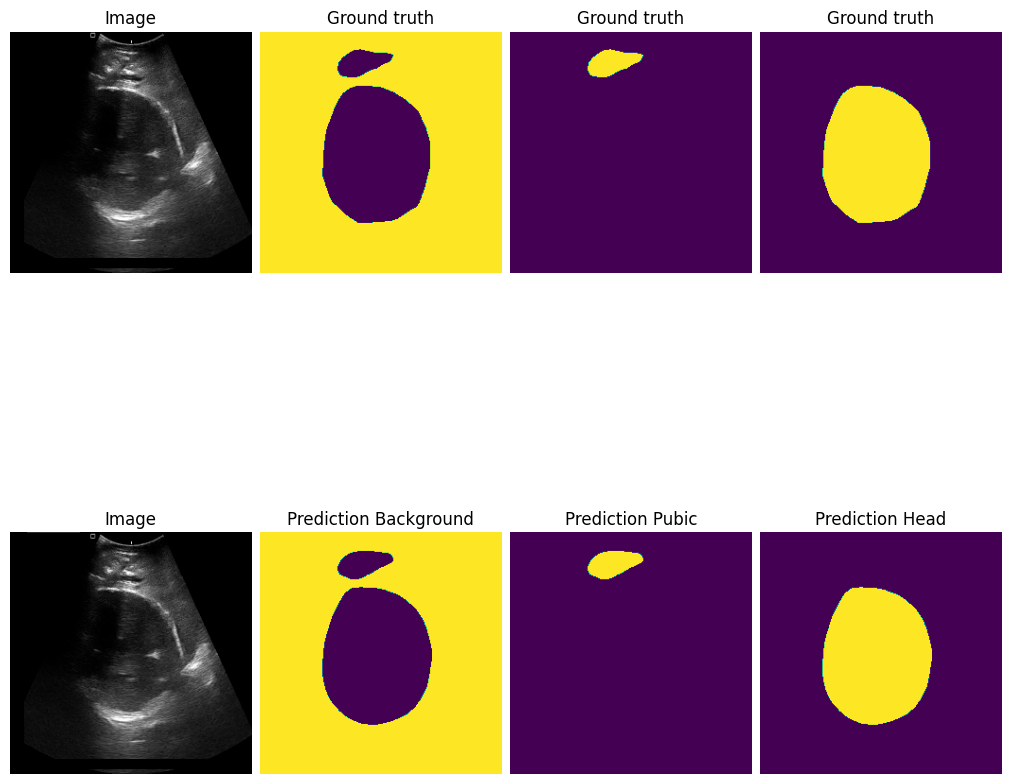

In [ ]:
with torch.no_grad():
  for x, y in test_dataloader:
    image = x.to(DEVICE)
    gt_mask = y.to(DEVICE).unsqueeze(1)
    preds = model(image)
    preds = preds[rand_idx]
    preds = (preds > 0.5).float()

    plt.figure(figsize=(10, 10), layout='constrained')

    plt.subplot(2, 4, 1)
    x = x[rand_idx,:,:,:]
    print(x.shape)
    plt.imshow(x.permute(1, 2, 0))
    plt.title("Image")
    plt.axis("off")

    plt.subplot(2, 4, 2)
    y1 = y[rand_idx,:,:,:][0,:,:]
    plt.imshow(y1[:,:,None])
    plt.title("Ground truth")
    plt.axis("off")

    plt.subplot(2, 4, 3)
    y2 = y[rand_idx,:,:,:][1,:,:]
    plt.imshow(y2[:,:,None])
    plt.title("Ground truth")
    plt.axis("off")

    plt.subplot(2, 4, 4)
    y3 = y[rand_idx,:,:,:][2,:,:]
    plt.imshow(y3[:,:,None])
    plt.title("Ground truth")
    plt.axis("off")

    plt.subplot(2, 4, 5)
    #x = x[rand_idx,:,:,:]
    plt.imshow(x.permute(1, 2, 0))
    plt.title("Image")
    plt.axis("off")

    plt.subplot(2, 4, 6)
    preds1 = preds[0,:,:]
    plt.imshow(preds1[:,:,None].cpu().data)
    plt.title("Prediction Background")
    plt.axis("off")

    plt.subplot(2, 4, 7)
    preds2 = preds[1,:,:]
    plt.imshow(preds2[:,:,None].cpu().data)
    plt.title("Prediction Pubic")
    plt.axis("off")

    plt.subplot(2, 4, 8)
    preds3 = preds[2,:,:]
    plt.imshow(preds3[:,:,None].cpu().data)
    plt.title("Prediction Head")
    plt.axis("off")

    plt.show()

    break